# Handling Image Files

(100, 100, 3)


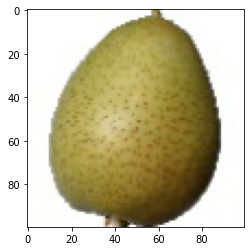

In [5]:
import numpy
import imageio
import matplotlib.pyplot as plt

im = imageio.imread("../images/pear.jpg")
print(im.shape)

plt.imshow(im)
plt.show()

# Finding Features in Images

## Canny Edge Detection

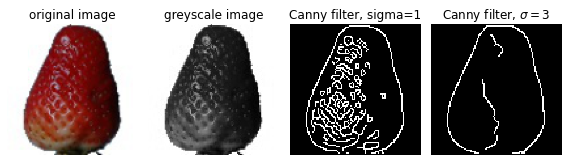

In [46]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import skimage.color as color 
import skimage.feature as feature


from scipy import ndimage as ndi
from skimage.util import random_noise

im = imageio.imread("../images/strawberry.jpg")

img = color.rgb2gray( im )

edges1 = feature.canny(img,sigma=1)
edges2 = feature.canny(img,sigma=3)

fig, ax = plt.subplots(nrows =1 ,ncols= 4, figsize= (8,3), sharex=True, sharey=True)

ax[0].imshow(im)
ax[0].set_title('original image')

ax[1].imshow(img,cmap=plt.cm.gray, interpolation='nearest' )
ax[1].set_title("greyscale image")

ax[2].imshow(edges1, cmap=plt.cm.gray, interpolation='nearest' )
ax[2].set_title("Canny filter, sigma=1")

ax[3].imshow(edges2, cmap=plt.cm.gray, interpolation='nearest' )
ax[3].set_title("Canny filter, $\sigma=3$")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()
# plt.imshow(img)
# plt.show()




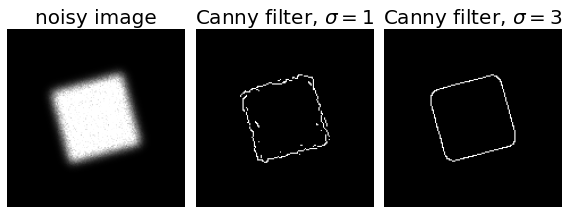

In [24]:
# example !!!!!!!!!!!! from internet 
import numpy as np
import imageio
import matplotlib.pyplot as plt
import skimage.color as color 
import skimage.feature as feature


from scipy import ndimage as ndi
from skimage.util import random_noise

# Generate noisy image of a square
image = np.zeros((128, 128), dtype=float)
image[32:-32, 32:-32] = 1

image = ndi.rotate(image, 15, mode='constant')
image = ndi.gaussian_filter(image, 4)
image = random_noise(image, mode='speckle', mean=0.1)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('noisy image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

## Thresholding and Convex Hull Computation

Otsu method threshold =  0.5884267693014706


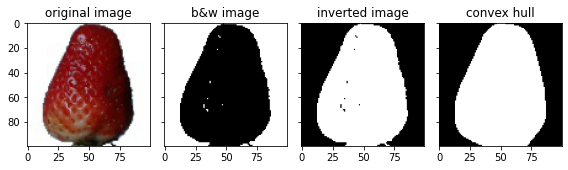

In [61]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import skimage.color as color 
import skimage.filters as filters
import skimage.util as util
import skimage.morphology as morphology



im = imageio.imread("../images/strawberry.jpg")

img = color.rgb2gray( im )

threshold = filters.threshold_otsu(img)
print('Otsu method threshold = ', threshold)
binary_img = img > threshold

inverted_binary_img = util.invert( binary_img )


hull = morphology.convex_hull_image( inverted_binary_img )

fig,axs = plt.subplots(nrows=1, ncols=4, figsize=(8, 3), sharex=True, sharey=True)

axs[0].imshow(im)
axs[0].set_title( 'original image')

axs[1].imshow( binary_img, cmap=plt.cm.gray)
axs[1].set_title( 'b&w image')

axs[2].imshow(inverted_binary_img, cmap=plt.cm.gray)
axs[2].set_title( 'inverted image')

axs[3].imshow( hull, cmap=plt.cm.gray )
axs[3].set_title( 'convex hull' )

fig.tight_layout()
plt.show()

## Finding Contours

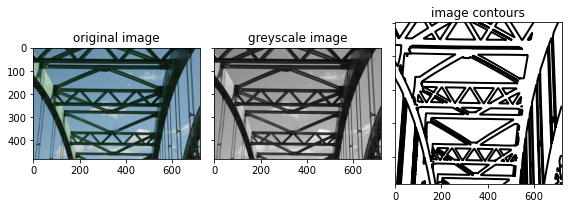

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import skimage.color as color 
import skimage.filters as filters
import skimage.measure as measure

im = imageio.imread("../images/green-bridge.jpg")

img = color.rgb2gray( im )

threshold = filters.threshold_otsu(img)

contours = measure.find_contours(img, threshold)

fig ,axs = plt.subplots(nrows = 1, ncols = 3, figsize = (8,3), sharex=True, sharey=True )

axs[0].imshow(im)
axs[0].set_title( 'original image' )

axs[1].imshow(img,cmap = plt.cm.gray)
axs[1].set_title("greyscale image")

for contour in contours :
    axs[2].plot(contour[:,1],contour[:,0], 'k-', linewidth=2 )
axs[2].set_title( 'image contours' )


fig.tight_layout()

plt.show()

## Finding Lines

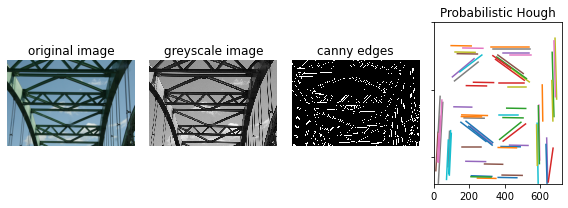

In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import skimage.color as color 
import skimage.feature as feature
import skimage.transform as transform

im = imageio.imread('../data/green-bridge.jpg')

img = color.rgb2gray(im)

edges1 = feature.canny(img)

lines = transform.probabilistic_hough_line(edges1,threshold=10,line_length=100,line_gap=3)

#-plot the results
fig, (ax0, ax1, ax2, ax3) = plt.subplots( nrows=1, ncols=4, figsize=(8, 3), sharex=True, sharey=True )

ax0.imshow( im )
ax0.axis( 'off' )
ax0.set_title( 'original image' )

ax1.imshow( img, cmap=plt.cm.gray, interpolation='nearest' )
ax1.axis( 'off' )
ax1.set_title( 'greyscale image' )

ax2.imshow( edges1, cmap=plt.cm.gray, interpolation='nearest' )
ax2.axis( 'off' )
ax2.set_title( 'canny edges' )

for line in lines:
    p0, p1 = line
    ax3.plot(( p0[0], p1[0] ), ( p0[1], p1[1] ))
ax3.set_xlim(( 0, img.shape[1] ))
ax3.set_ylim(( img.shape[0], 0 ))
ax3.set_title( 'Probabilistic Hough' )

fig.tight_layout()


plt.show()